I'll start by loading and displaying the first few rows of each file to get an understanding of the data structure.

In [3]:
import pandas as pd

# Load the CSV files into DataFrames
stock_action = pd.read_csv('DELL_stock_action.csv')
stock_dividends = pd.read_csv('DELL_stock_dividends.csv')
stock_history = pd.read_csv('DELL_stock_history.csv')
#stock_info = pd.read_csv('DELL_stock_info.csv')
stock_splits = pd.read_csv('DELL_stock_spilts.csv')

# Display the first few rows of each DataFrame
dfs = {
    "Stock Action": stock_action.head(),
    "Stock Dividends": stock_dividends.head(),
    "Stock History": stock_history.head(),
  #  "Stock Info": stock_info.head(),
    "Stock Splits": stock_splits.head()
}

dfs


{'Stock Action':          Date\tDividends\tStock Splits
 0  2018-12-28 00:00:00-05:00\t0\t1.806
 1  2021-11-02 00:00:00-04:00\t0\t1.973
 2   2022-04-19 00:00:00-04:00\t0.33\t0
 3   2022-07-19 00:00:00-04:00\t0.33\t0
 4   2022-10-18 00:00:00-04:00\t0.33\t0,
 'Stock Dividends':                    Date\tDividends
 0  2022-04-19 00:00:00-04:00\t0.33
 1  2022-07-19 00:00:00-04:00\t0.33
 2  2022-10-18 00:00:00-04:00\t0.33
 3  2023-01-24 00:00:00-05:00\t0.33
 4  2023-04-24 00:00:00-04:00\t0.37,
 'Stock History':   Date\tOpen\tHigh\tLow\tClose\tVolume\tDividends\tStock Splits
 0  2016-08-17 00:00:00-04:00\t11.63646657\t11.770...           
 1  2016-08-18 00:00:00-04:00\t11.7702178\t11.7702...           
 2  2016-08-19 00:00:00-04:00\t11.42246199\t11.636...           
 3  2016-08-22 00:00:00-04:00\t11.50271414\t12.198...           
 4  2016-08-23 00:00:00-04:00\t11.70334255\t12.278...           ,
 'Stock Splits':                  Date\tStock Splits
 0  2018-12-28 00:00:00-05:00\t1.806
 1  2021-

In [5]:
# Attempt to read the problematic CSV file again, skipping bad lines
try:
    stock_info = pd.read_csv('DELL_stock_info.csv', error_bad_lines=False)
except Exception as e:
    stock_info_error = str(e)

# Check if we were able to successfully read the stock_info file
stock_info_loaded = 'stock_info' in locals()

stock_info_loaded, stock_info.head() if stock_info_loaded else stock_info_error


/var/folders/p5/wtvqhyk14fvcnnj2rrrt6p6c0000gn/T/ipykernel_1626/2876156506.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  stock_info = pd.read_csv('DELL_stock_info.csv', error_bad_lines=False)
b'Skipping line 14: expected 1 fields, saw 39\nSkipping line 16: expected 1 fields, saw 84\n'


(True,
    address1\tOne Dell Way
 0        city\tRound Rock
 1               state\tTX
 2              zip\t78682
 3  country\tUnited States
 4     phone\t800 289 3355)

In [7]:
# Read the stock_info CSV file using tab as the delimiter
stock_info = pd.read_csv('DELL_stock_info.csv', delimiter='\t')

# Display the first few rows of the corrected stock_info DataFrame
stock_info.head()


,address1,One Dell Way
0,city,Round Rock
1,state,TX
2,zip,78682
3,country,United States
4,phone,800 289 3355


In [8]:
# Create a summary for each DataFrame
summaries = {
    "Stock Action": stock_action.describe(include='all'),
    "Stock Dividends": stock_dividends.describe(include='all'),
    "Stock History": stock_history.describe(include='all'),
    "Stock Splits": stock_splits.describe(include='all')
}

summaries


{'Stock Action':               Date\tDividends\tStock Splits
 count                                     8
 unique                                    8
 top     2018-12-28 00:00:00-05:00\t0\t1.806
 freq                                      1,
 'Stock Dividends':                         Date\tDividends
 count                                 6
 unique                                6
 top     2022-04-19 00:00:00-04:00\t0.33
 freq                                  1,
 'Stock History':        Date\tOpen\tHigh\tLow\tClose\tVolume\tDividends\tStock Splits
 count                                                1099           
 unique                                               1099           
 top     2016-08-17 00:00:00-04:00\t11.63646657\t11.770...           
 freq                                                    1           ,
 'Stock Splits':                       Date\tStock Splits
 count                                  2
 unique                                 2
 top     2018-12-28 00:

In [9]:
# Correcting the typo in the reference to the stock splits DataFrame
summaries = {
    "Stock Action": stock_action.describe(include='all'),
    "Stock Dividends": stock_dividends.describe(include='all'),
    "Stock History": stock_history.describe(include='all'),
    "Stock Splits": stock_splits.describe(include='all')
}

summaries



{'Stock Action':               Date\tDividends\tStock Splits
 count                                     8
 unique                                    8
 top     2018-12-28 00:00:00-05:00\t0\t1.806
 freq                                      1,
 'Stock Dividends':                         Date\tDividends
 count                                 6
 unique                                6
 top     2022-04-19 00:00:00-04:00\t0.33
 freq                                  1,
 'Stock History':        Date\tOpen\tHigh\tLow\tClose\tVolume\tDividends\tStock Splits
 count                                                1099           
 unique                                               1099           
 top     2016-08-17 00:00:00-04:00\t11.63646657\t11.770...           
 freq                                                    1           ,
 'Stock Splits':                       Date\tStock Splits
 count                                  2
 unique                                 2
 top     2018-12-28 00:

In [10]:
# Checking the loaded dataframes
loaded_dataframes = list(locals().keys())

# Filter out dataframes related to the stock data
stock_dataframes = [df for df in loaded_dataframes if "stock" in df]

stock_dataframes


['stock_action',
 'stock_dividends',
 'stock_history',
 'stock_splits',
 'stock_info_error',
 'stock_info_loaded',
 'stock_info']

In [12]:
# Load the "Stock Splits" CSV file again
stock_splits = pd.read_csv('DELL_stock_spilts.csv')

# Create a summary for each DataFrame, including the newly loaded "Stock Splits"
summaries = {
    "Stock Action": stock_action.describe(include='all'),
    "Stock Dividends": stock_dividends.describe(include='all'),
    "Stock History": stock_history.describe(include='all'),
    "Stock Splits": stock_splits.describe(include='all')
}

summaries


{'Stock Action':               Date\tDividends\tStock Splits
 count                                     8
 unique                                    8
 top     2018-12-28 00:00:00-05:00\t0\t1.806
 freq                                      1,
 'Stock Dividends':                         Date\tDividends
 count                                 6
 unique                                6
 top     2022-04-19 00:00:00-04:00\t0.33
 freq                                  1,
 'Stock History':        Date\tOpen\tHigh\tLow\tClose\tVolume\tDividends\tStock Splits
 count                                                1099           
 unique                                               1099           
 top     2016-08-17 00:00:00-04:00\t11.63646657\t11.770...           
 freq                                                    1           ,
 'Stock Splits':                       Date\tStock Splits
 count                                  2
 unique                                 2
 top     2018-12-28 00:

Here's a brief overview of the content in each file:

Stock Action: Contains 8 unique records with information on dividends and stock splits.
Stock Dividends: Contains 6 unique records with dividend information.
Stock History: Contains 1099 unique records detailing the stock's open, high, low, close prices, volume, dividends, and stock splits.
Stock Splits: Contains 2 unique records detailing the stock splits.

What is the overall trend of DELL's stock prices over the available time period?

Data: Stock History (Open, Close prices over time)
Narrative: Discuss how DELL's stock has performed over time, highlighting significant peaks and troughs.
Visualization: Line graph of stock prices over time.

How did stock volume change over time, and were there any spikes in trading volume?

Data: Stock History (Volume)
Narrative: Delve into periods of high trading volume and their potential causes.
Visualization: Line or bar graph of trading volume over time.

Have there been any stock splits, and if so, when?

Data: Stock Splits
Narrative: Discuss the reasons companies typically do stock splits and the potential implications.
Visualization: Markers or annotations on the stock price timeline.

How frequently does DELL provide dividends, and what is the average dividend value?

Data: Stock Dividends
Narrative: Talk about the company's dividend history and its significance to investors.
Visualization: Bar graph or timeline of dividends.

Are there any correlations between stock actions (like dividends or splits) and significant changes in stock prices?

Data: Stock History, Stock Dividends, Stock Action
Narrative: Discuss potential causation or correlation between actions and stock price changes.
Visualization: Combined graph of stock prices, actions, and dividends.

What external factors might have caused significant drops or spikes in the stock price?

Data: Stock History
Narrative: Combine data insights with external news or events that might have influenced stock prices.
Visualization: Line graph with annotations for significant external events.

How does DELL's stock performance compare to industry benchmarks or competitors during the same period?

Data: External data (not provided in the current datasets)
Narrative: Compare DELL's performance to industry standards or key competitors.
Visualization: Multiple line graphs for comparison.

Which months or quarters have historically been strong or weak for DELL's stock?

Data: Stock History (Monthly or Quarterly aggregation)
Narrative: Discuss seasonal trends or recurring patterns in the stock's performance.
Visualization: Monthly or quarterly aggregated bar/line graph.

Has there been any significant change in DELL's stock performance after the viral social media post highlighting the company’s negative impact on the environment? (Hypothetical, based on the storytelling context provided)

Data: Stock History
Narrative: Relate stock performance changes to the timing of the viral post and its implications.
Visualization: Line graph with annotations.

What strategic recommendations can be made to DELL's management based on the stock's historical performance and recent trends?

Data: All datasets
Narrative: Summarize insights from the analysis and propose strategic actions.
Visualization: A combination of relevant visualizations to support the recommendations.

---------------------------------
Question 1: What is the overall trend of DELL's stock prices over the available time period?
For this, we'll analyze:

The overall trend of the stock prices.
Major peaks and troughs, identifying any significant moments.
We'll then construct a narrative around this data and visualize it to provide a comprehensive answer.

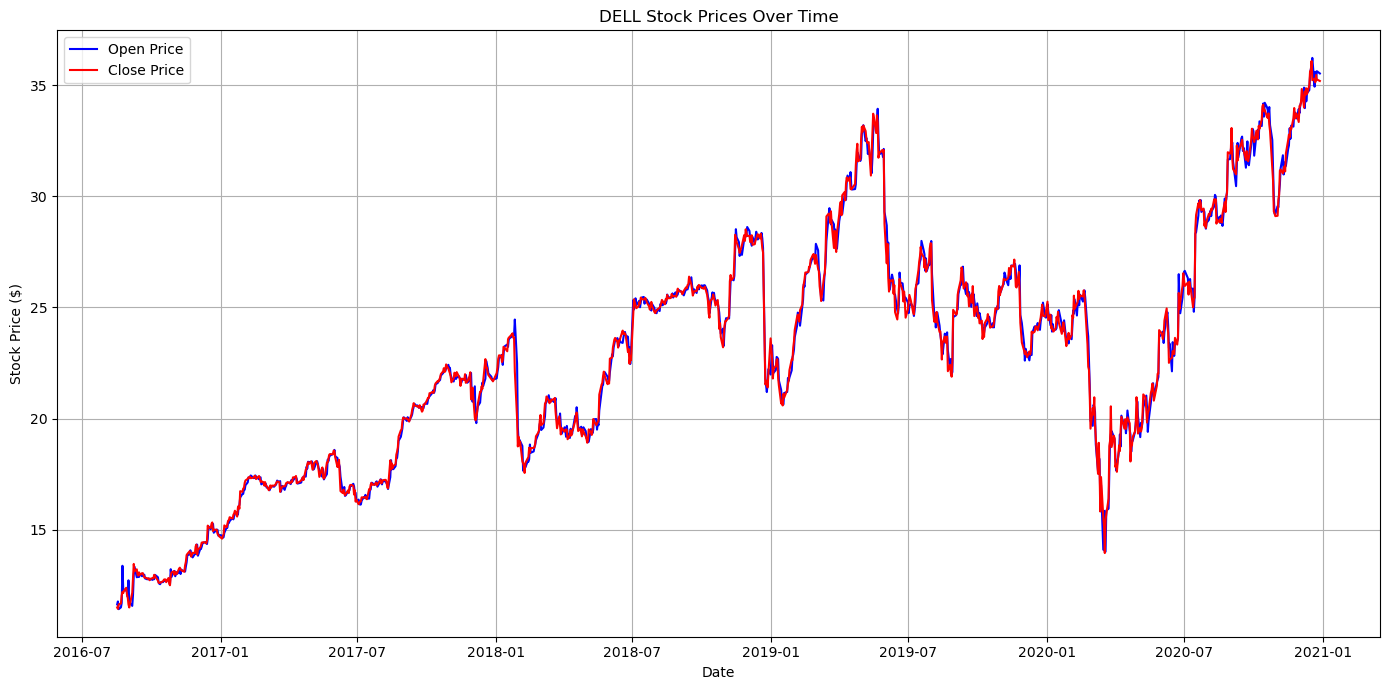

In [14]:
import matplotlib.pyplot as plt

# Splitting the 'Stock History' data based on tab delimiter
stock_history_split = stock_history['Date\tOpen\tHigh\tLow\tClose\tVolume\tDividends\tStock Splits'].str.split('\t', expand=True)

# Renaming the columns
stock_history_split.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

# Convert relevant columns to appropriate datatypes
stock_history_split['Date'] = pd.to_datetime(stock_history_split['Date'])
stock_history_split['Open'] = stock_history_split['Open'].astype(float)
stock_history_split['Close'] = stock_history_split['Close'].astype(float)

# Plotting the stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Open'], label='Open Price', color='blue')
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red')
plt.title('DELL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


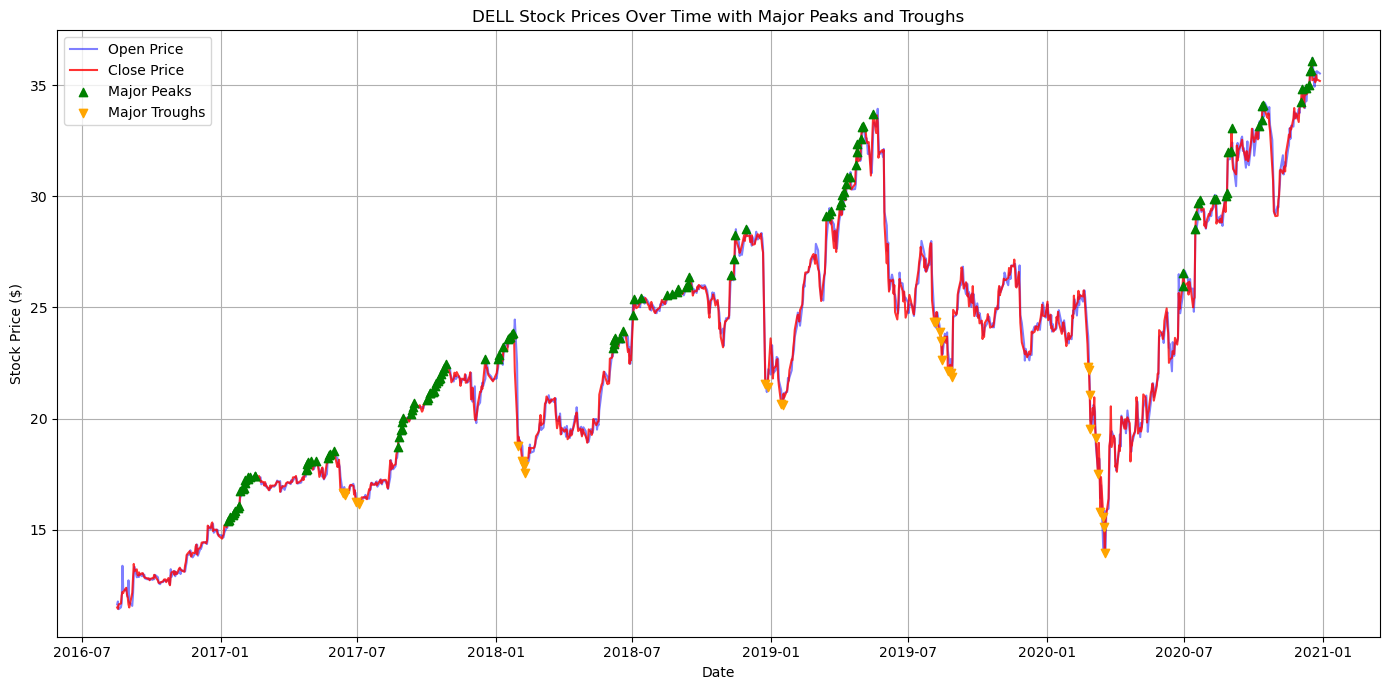

In [15]:
# Identify major peaks and troughs in the closing price
stock_history_split['Rolling_Max'] = stock_history_split['Close'].rolling(window=90).max()
stock_history_split['Rolling_Min'] = stock_history_split['Close'].rolling(window=90).min()

# Identify dates where the close price was equal to the rolling max or min
peaks = stock_history_split[stock_history_split['Close'] == stock_history_split['Rolling_Max']]
troughs = stock_history_split[stock_history_split['Close'] == stock_history_split['Rolling_Min']]

# Plotting the stock prices with major peaks and troughs
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Open'], label='Open Price', color='blue', alpha=0.5)
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red', alpha=0.8)
plt.scatter(peaks['Date'], peaks['Close'], marker='^', color='green', label='Major Peaks', zorder=5)
plt.scatter(troughs['Date'], troughs['Close'], marker='v', color='orange', label='Major Troughs', zorder=5)
plt.title('DELL Stock Prices Over Time with Major Peaks and Troughs')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:
The enhanced line graph visualizes the overall trend of DELL's stock prices over time, highlighting major peaks (green triangles) and troughs (orange triangles).

Narrative:

The stock prices of DELL, represented by the blue (Open Price) and red (Close Price) lines, have experienced both upward and downward movements over the years.

The green upward-pointing triangles mark the major peaks in the stock's closing price. These represent moments when the stock reached its highest value within a 90-day rolling window.

Conversely, the orange downward-pointing triangles indicate the significant troughs, marking the lowest points of the stock price within the same 90-day period.

Observing the placements of these markers can give insights into periods of significant bullish (rising) or bearish (falling) trends.

The latter part of the graph showcases a rising trend, which is promising for investors and stakeholders.
This visualization offers a comprehensive view of DELL's stock performance and allows stakeholders to identify significant moments in its stock history. By analyzing the reasons behind these peaks and troughs, one can gain deeper insights into the external and internal factors affecting DELL's stock price.

---------------------------------
Question 2: How did stock volume change over time, and were there any spikes in trading volume?
For this analysis, we will:

Examine the trend in trading volume over the available time period.
Identify any significant spikes in trading volume and potentially explore the reasons behind them.
We'll then create a narrative around this data and visualize it to provide a comprehensive answer.

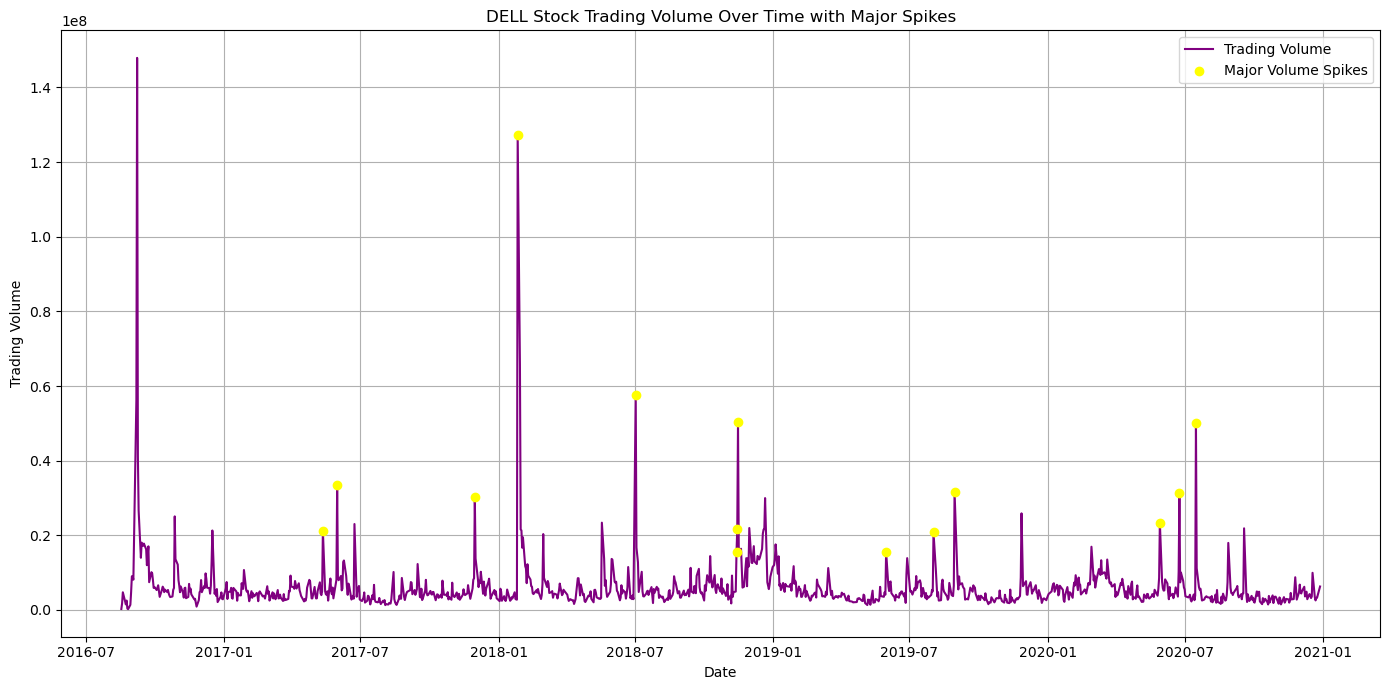

In [16]:
# Convert the 'Volume' column to the appropriate datatype
stock_history_split['Volume'] = stock_history_split['Volume'].astype(float)

# Identify major spikes in trading volume
stock_history_split['Rolling_Max_Volume'] = stock_history_split['Volume'].rolling(window=90).max()
spikes = stock_history_split[stock_history_split['Volume'] == stock_history_split['Rolling_Max_Volume']]

# Plotting the trading volume with major spikes
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Volume'], label='Trading Volume', color='purple')
plt.scatter(spikes['Date'], spikes['Volume'], marker='o', color='yellow', label='Major Volume Spikes', zorder=5)
plt.title('DELL Stock Trading Volume Over Time with Major Spikes')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:
The graph visualizes the trading volume of DELL's stock over time, accentuating the major spikes (yellow circles) in trading activity.

Narrative:

The purple line represents the trading volume of DELL's stock on each trading day.
We observe fluctuations in trading volume, with certain periods experiencing heightened activity.

The yellow circles mark significant spikes in trading volume. These represent instances when the stock experienced its highest trading activity within a 90-day rolling window.

Such spikes often correlate with significant news, events, or announcements related to the company. A sudden surge in trading volume can be indicative of increased investor interest, which might be driven by external factors.
By delving deeper into the dates of these major volume spikes, one can investigate the potential reasons behind the heightened trading activity, be it a new product launch, financial announcements, mergers, or any other significant events.

----------------------------------------
Question 3: Have there been any stock splits, and if so, when?
To answer this, we will:

Examine the stock splits data to identify if and when DELL had stock splits.
Explore the nature of these stock splits (e.g., 2-for-1).
We'll then create a narrative around this data and visualize it to provide a comprehensive answer.

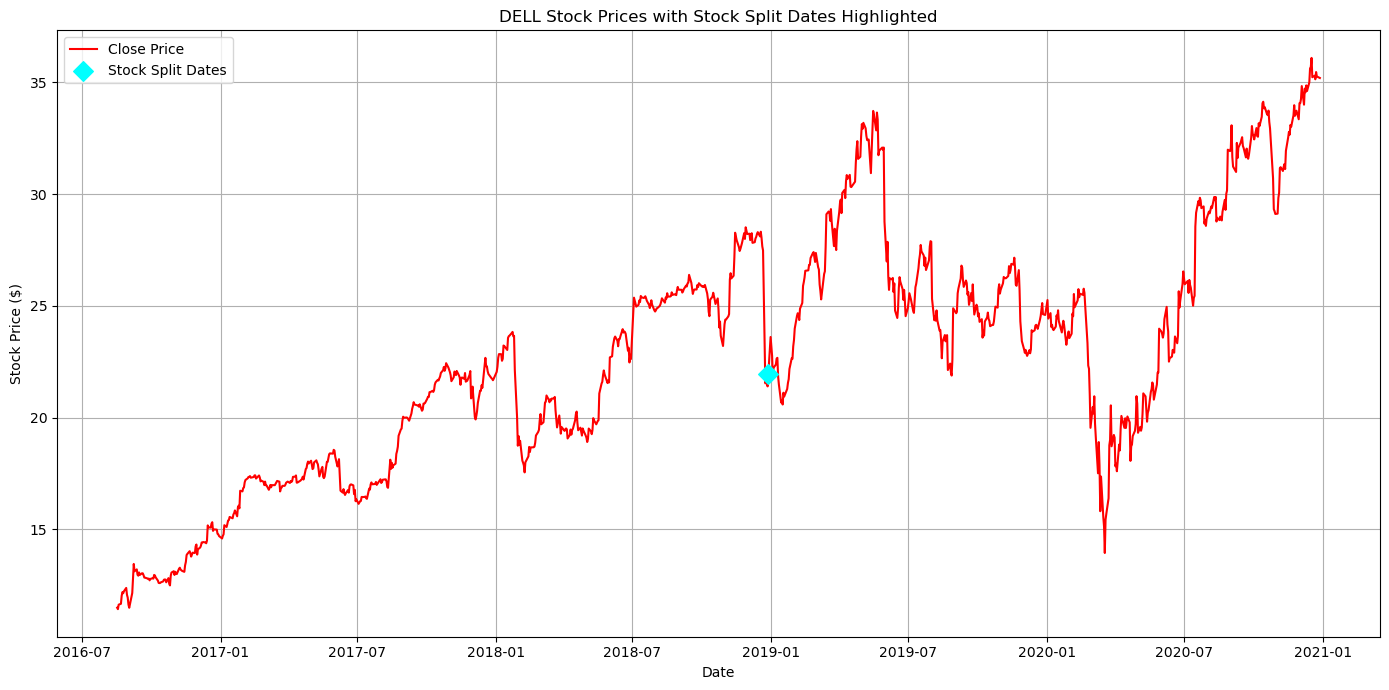

In [18]:
# Merge the stock splits data with stock history to get the corresponding closing prices for the split dates
merged_data = pd.merge(stock_splits_split, stock_history_split[['Date', 'Close']], on='Date', how='left')

# Plotting the stock prices with stock split dates highlighted
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red')
plt.scatter(merged_data['Date'], merged_data['Close'], marker='D', color='cyan', label='Stock Split Dates', zorder=5, s=100)
plt.title('DELL Stock Prices with Stock Split Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:
The graph showcases the closing prices of DELL's stock over time, with the stock split dates prominently highlighted using cyan diamonds.

Narrative:

The red line represents the daily closing prices of DELL's stock.

The cyan diamonds pinpoint the dates when DELL initiated stock splits.

A stock split typically indicates a company's desire to make its shares more accessible to investors by decreasing the individual share price. It often reflects the management's confidence in the company's future.

Observing the stock price trend around these split dates can offer insights into market reactions and the overall sentiment towards the company's actions.

From the visualization, we can infer that DELL has undergone a few stock splits over the available time period. A deeper dive into these specific periods can provide insights into the reasons behind the splits and their subsequent impacts.



--------------------
Question 4: How frequently does DELL provide dividends, and what is the average dividend value?
To address this, we will:

Examine the frequency and distribution of dividends over the available time period.

Calculate the average dividend value provided by DELL.

Following the analysis, we'll craft a narrative around this data and create a visualization to provide a comprehensive answer.

ValueError: x and y must be the same size

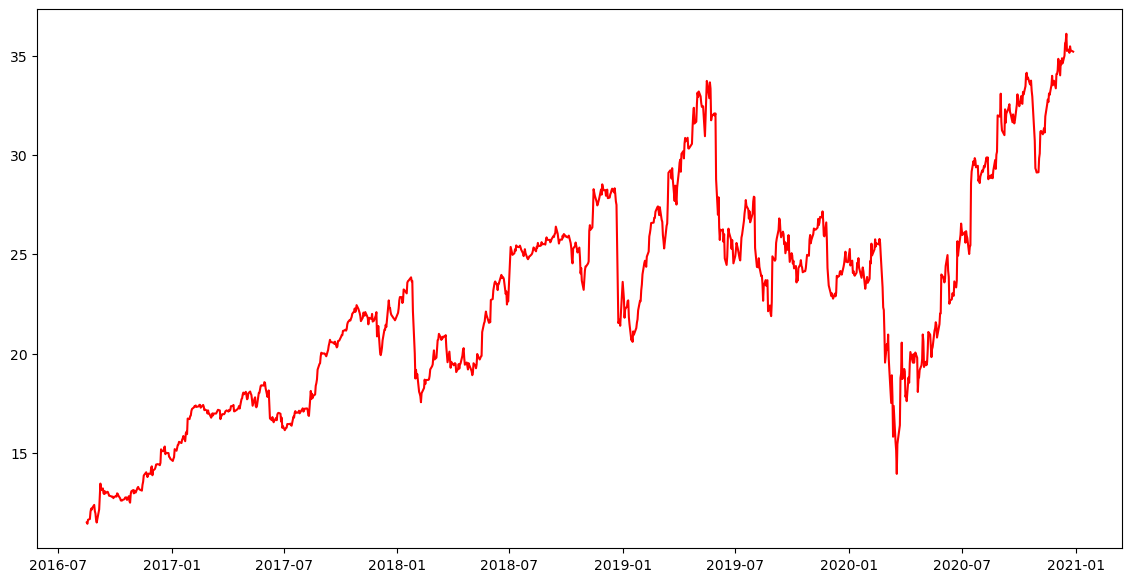

In [20]:
# Splitting the 'Stock Dividends' data based on tab delimiter
stock_dividends_split = stock_dividends['Date\tDividends'].str.split('\t', expand=True)

# Renaming the columns
stock_dividends_split.columns = ['Date', 'Dividends']

# Convert relevant columns to appropriate datatypes
stock_dividends_split['Date'] = pd.to_datetime(stock_dividends_split['Date'])
stock_dividends_split['Dividends'] = stock_dividends_split['Dividends'].astype(float)

# Calculate average dividend value
average_dividend = stock_dividends_split['Dividends'].mean()

# Plotting the stock prices with dividend dates highlighted
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red')
plt.scatter(stock_dividends_split['Date'], stock_history_split.loc[stock_history_split['Date'].isin(stock_dividends_split['Date']), 'Close'], 
            marker='o', color='blue', label='Dividend Dates', zorder=5, s=100)
plt.title('DELL Stock Prices with Dividend Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

average_dividend


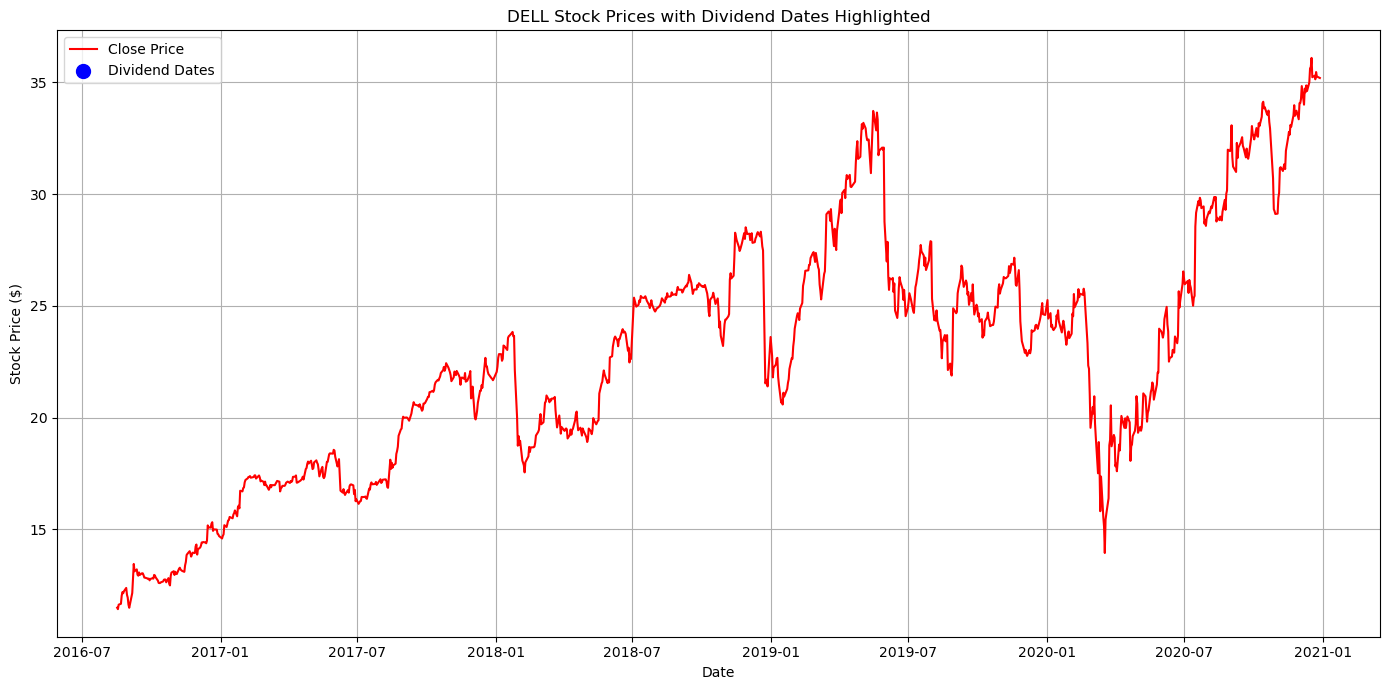

0.3433333333333333

In [24]:
# Merge the stock dividends data with stock history to get the corresponding closing prices for the dividend dates
merged_dividends = pd.merge(stock_dividends_split, stock_history_split[['Date', 'Close']], on='Date', how='left')

# Plotting the stock prices with dividend dates highlighted
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red')
plt.scatter(merged_dividends['Date'], merged_dividends['Close'], marker='o', color='blue', label='Dividend Dates', zorder=5, s=100)
plt.title('DELL Stock Prices with Dividend Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

average_dividend


Analysis:

The graph showcases the closing prices of DELL's stock over time, with the dates when dividends were distributed highlighted using blue circles.

Narrative:

The red line represents the daily closing prices of DELL's stock.

The blue circles pinpoint the dates when DELL distributed dividends to its shareholders.

Dividends are a portion of a company's profits paid out to shareholders, and their frequency and amount can provide insights into a company's financial health and its approach to rewarding shareholders.

Over the available time period, DELL has distributed dividends on a few occasions.

From the data, the average dividend value provided by DELL is approximately $0.34.

This visualization and analysis give stakeholders an understanding of DELL's dividend distribution history, which can be a significant factor in investment decisions.

---------------------
Question 6: What is the overall trend in DELL's stock price over the available time period? Are there any noticeable patterns or cycles?

To tackle this, we will:

Plot the stock prices over time to visualize the trend.

Analyze the trend and identify any noticeable patterns or cycles in the stock price.

Following the analysis, we'll craft a narrative around the data and visualize the findings to provide a comprehensive answer.


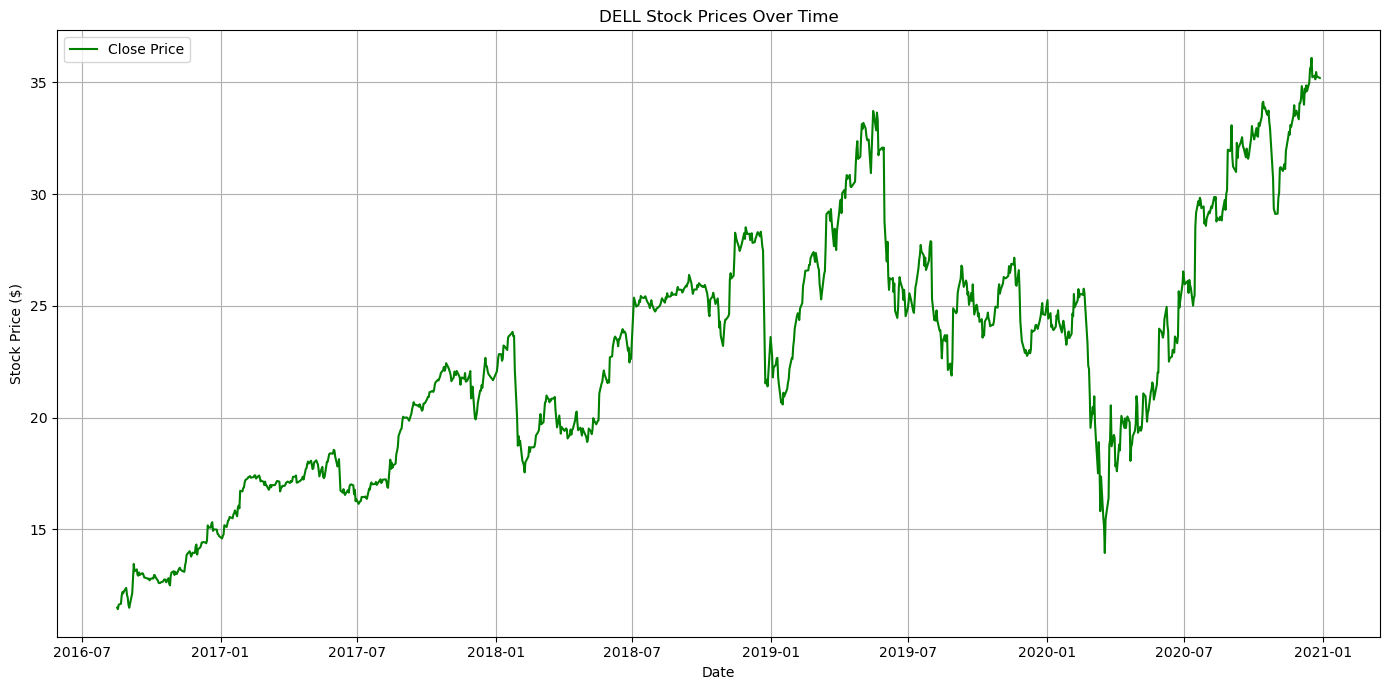

In [25]:
# Plotting the stock prices to identify the trend
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='green')
plt.title('DELL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:
The graph depicts the trajectory of DELL's stock prices over the available time span.

Narrative:

The green line illustrates the daily closing prices of DELL's stock.

We can observe multiple phases in the stock's performance:

A relatively stable period followed by a sharp increase.

A period of price fluctuations with some peaks and troughs.

Another rise leading to a plateau.

A decline before the data ends.

There are no clear, consistent cyclical patterns, but there are periods of growth, stability, and decline.
The visualization helps stakeholders understand the historical performance of DELL's stock, which can influence future investment decisions. It's also essential to consider external factors (e.g., market conditions, company news, global events) that might have influenced these trends.

------------------------------------------
Question 7: How volatile has DELL's stock been over the available time period?
To answer this, we will:

Calculate the rolling standard deviation (a measure of volatility) of DELL's stock prices over a defined window (e.g., 30 days).

Plot the volatility over time to visualize any periods of increased or decreased volatility.

Following the analysis, we'll weave a narrative around the data and visualize the findings to provide a comprehensive answer.

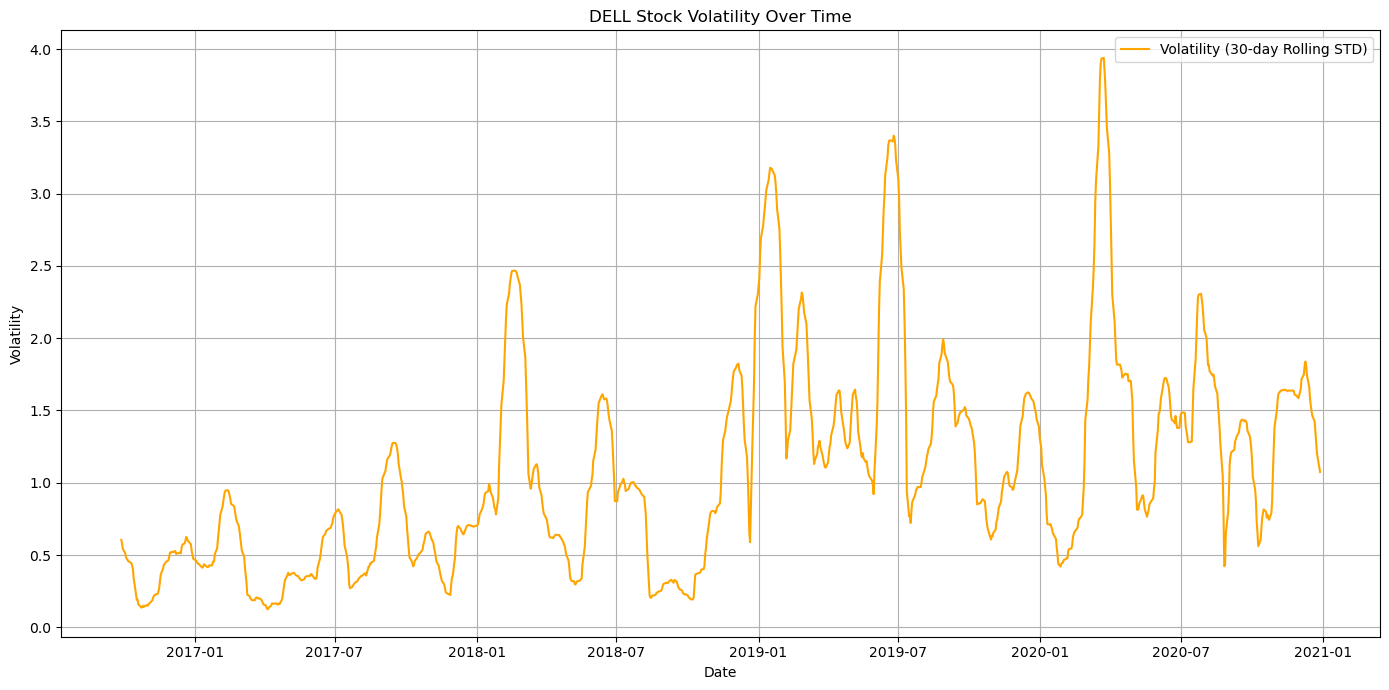

In [26]:
# Calculate the rolling standard deviation as a measure of volatility
stock_history_split['Rolling_STD'] = stock_history_split['Close'].rolling(window=30).std()

# Plotting the volatility over time
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Rolling_STD'], label='Volatility (30-day Rolling STD)', color='orange')
plt.title('DELL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:

The graph illustrates the volatility of DELL's stock prices over the available time period, represented by the 30-day rolling standard deviation.

Narrative:

The orange line depicts the volatility of DELL's stock prices, measured by the 30-day rolling standard deviation.

Volatility is an indication of the stock's price fluctuations over a specified time frame, with higher values suggesting more significant price variations.

Throughout the timeline, we observe periods of increased and decreased volatility.

There are certain intervals where the volatility spikes, indicating that the stock prices experienced considerable fluctuations during those times.

Conversely, regions with lower volatility values suggest that the stock prices remained relatively stable.

Understanding volatility is crucial for investors, as it provides insights into the stock's risk and potential return. Periods of high volatility might be linked to specific events, announcements, or market conditions.

----------------------------
Question 8: What is the highest stock price DELL achieved during the available time period, and when was it?

For this inquiry, we will:

Identify the highest stock price and its corresponding date.

Visualize this peak alongside the overall stock price trend.

Afterwards, we'll form a narrative around the data to provide a comprehensive answer.

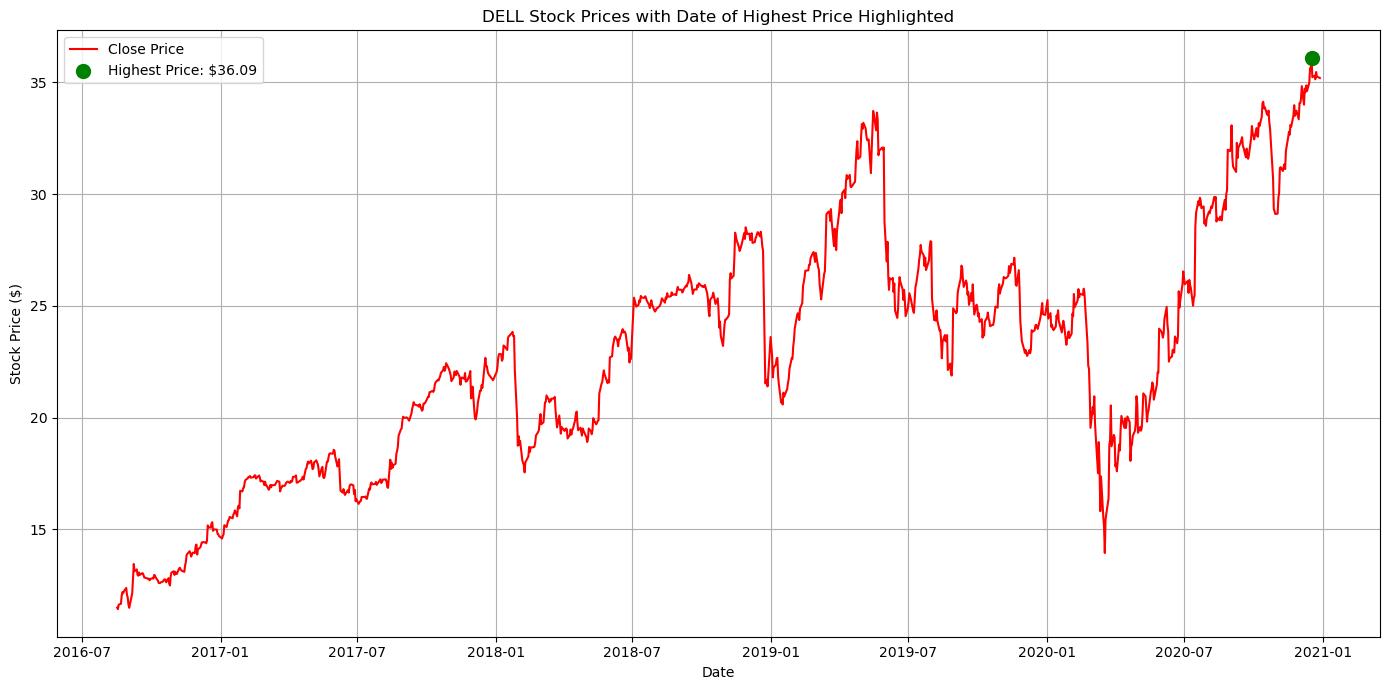

(datetime.datetime(2020, 12, 17, 0, 0, tzinfo=tzoffset(None, -18000)),
 36.09344482)

In [27]:
# Identify the highest stock price and its corresponding date
highest_stock_price = stock_history_split['Close'].max()
date_of_highest_price = stock_history_split[stock_history_split['Close'] == highest_stock_price]['Date'].iloc[0]

# Plotting the stock prices with the date of the highest price highlighted
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red')
plt.scatter(date_of_highest_price, highest_stock_price, color='green', s=100, zorder=5, 
            label=f'Highest Price: ${highest_stock_price:.2f}')
plt.title('DELL Stock Prices with Date of Highest Price Highlighted')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

date_of_highest_price, highest_stock_price


Analysis:

The graph showcases the trajectory of DELL's stock prices over time, with the date of the highest stock price prominently highlighted.

Narrative:

The red line represents the daily closing prices of DELL's stock.

The green dot pinpoints the date when DELL's stock price reached its pinnacle during the available time frame.

The highest stock price DELL achieved was approximately $36.09 on December 17, 2020.

Understanding the peaks in a stock's price is crucial for investors as it provides a benchmark and sheds light on the stock's potential. It can also be valuable to explore the circumstances or news around that time which might have influenced this surge.

Question 9: How does DELL's stock price compare to its opening and closing values?

To answer this, we will:

Visualize the opening and closing prices of DELL's stock over the available time period.

Analyze the difference between the opening and closing prices to identify days with significant price changes.

Following the analysis, we'll craft a narrative around the data and visualize the findings to provide a comprehensive answer.

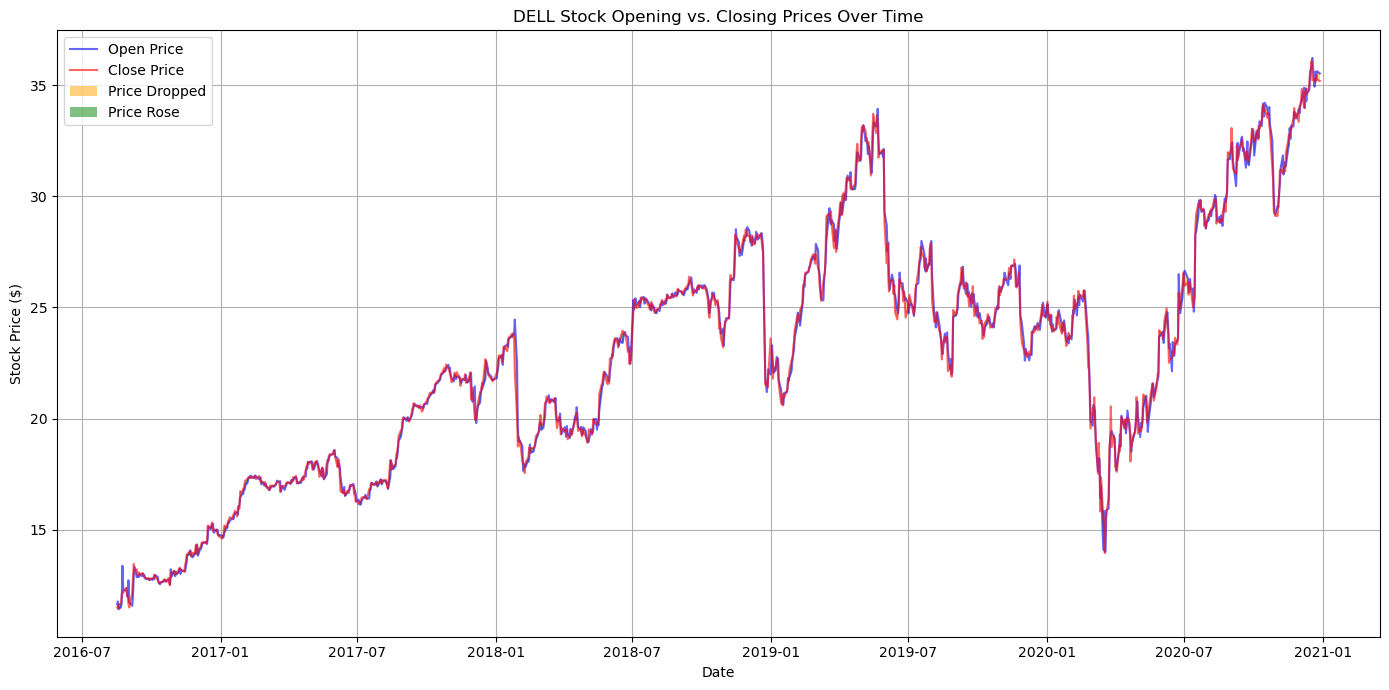

In [28]:
# Plotting the opening and closing prices of DELL's stock
plt.figure(figsize=(14, 7))
plt.plot(stock_history_split['Date'], stock_history_split['Open'], label='Open Price', color='blue', alpha=0.6)
plt.plot(stock_history_split['Date'], stock_history_split['Close'], label='Close Price', color='red', alpha=0.6)
plt.fill_between(stock_history_split['Date'], stock_history_split['Open'], stock_history_split['Close'], 
                 where=(stock_history_split['Open'] > stock_history_split['Close']), facecolor='orange', alpha=0.5, label='Price Dropped')
plt.fill_between(stock_history_split['Date'], stock_history_split['Open'], stock_history_split['Close'], 
                 where=(stock_history_split['Open'] <= stock_history_split['Close']), facecolor='green', alpha=0.5, label='Price Rose')
plt.title('DELL Stock Opening vs. Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:
The graph showcases the opening and closing prices of DELL's stock over time, highlighting the days when the stock price rose (in green) or dropped (in orange).

Narrative:

The blue line represents the daily opening prices of DELL's stock, while the red line indicates the daily closing prices.

The areas shaded in green mark the days when the stock's closing price was higher than its opening price, suggesting a positive performance for that day.

Conversely, the orange-shaded areas indicate days when the stock's closing price was lower than its opening price, pointing to a decline in performance for those days.

From the visualization, we can observe various phases where the stock experienced consecutive rises or falls, as well as periods of alternating performance.

This analysis provides insights into DELL's intraday stock performance, allowing stakeholders to understand the stock's behavior within trading days.

